<a href="https://colab.research.google.com/github/jeanraisa/Data_Preprocessing/blob/main/ml_pipeline_%5BIrakoze_Jean_Raisa%5D_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing Approach for Portfolio Project

## Project Title: CancerScope Diagnosis

## Student Name: Irakoze Jean Raisa

---

1. **Data Sources and Aggregation:**
   - List all sources of data for the project. **You must consider sources outside kaggle, google datasets** (insert links where necessary to online platforms,research papers etc)

   The sources to the data on Cancer diagnosis stems a big range of sources from online platform, and among those sources we have:

  1.  **data.world datasets**
   
   https://data.world/search?scope=_all

   2. **National Cancer Institute (NCI) Data**

   The NCI offers a wealth of cancer datasets, including clinical trial data, epidemiological data, and cancer research datasets.
   
   - Determine if data aggregation from multiple sources is necessary for comprehensive analysis.

   Aggregating data from multiple sources is often necessary for a comprehensive analysis, especially when studying complex phenomena.Data aggregation is crucial for comprehensive cancer diagnosis analysis. Cancer research involves genomic, proteomic, clinical, imaging, and lifestyle data. No single dataset provides all these elements comprehensively. Using multiple sources helps validate findings and reduce biases or errors inherent in single-source datasets.



In [2]:
#insert code if necessary
import pandas as pd
# Load the dataset
file_path = "The_Cancer_data_1500_V2.csv"
data = pd.read_csv(file_path)

data.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1




2. **Data Format Transformation:**
   - Describe the current format of the data.
   - Outline the planned transformation to a unified format suitable for analysis and modeling.

 **Current format:** the dataset is a tabular CSV file

 **Planned transformation:**

 * **Data cleaning:** checking for the missing values
 * **Feature Engineering:** Apply Min-Max Scaling to BMI, PhysicalActivity, and AlcoholIntake to align their ranges.
 * **Feature Selection:** Evaluate the relevance of each feature to the target variable (Diagnosis) through correlation analysis and statistical tests.

3. **Data Exploration:**
   - Enumerate the features included in the dataset.
   
   - Summarize findings from exploratory data analysis (EDA) including distributions, correlations, and outliers.
   
  **Insert code for data exploration below**


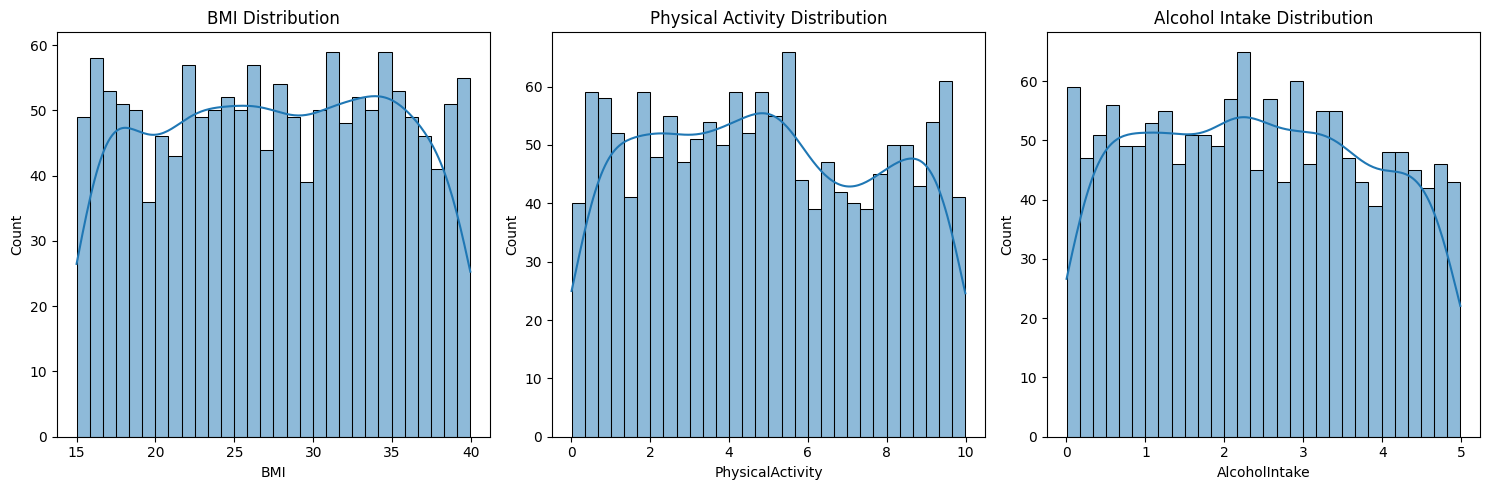

In [12]:
#Include plots for EDA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plotting histograms for continuous variables (BMI, PhysicalActivity, AlcoholIntake)
plt.figure(figsize=(15, 5))

# BMI distribution
plt.subplot(1, 3, 1)
sns.histplot(data['BMI'], bins=30, kde=True)
plt.title('BMI Distribution')

# PhysicalActivity distribution
plt.subplot(1, 3, 2)
sns.histplot(data['PhysicalActivity'], bins=30, kde=True)
plt.title('Physical Activity Distribution')

# AlcoholIntake distribution
plt.subplot(1, 3, 3)
sns.histplot(data['AlcoholIntake'], bins=30, kde=True)
plt.title('Alcohol Intake Distribution')

plt.tight_layout()
plt.show()





4. **Hypothesis Testing:**
   - State any preexisting hypotheses about the data.
   - Explain methodologies to empirically test these hypotheses.
   
   **Preexisting hypotheses:**

   1. Individuals with a history of cancer have a higher probability of a positive cancer diagnosis.

   2. Smoking status is associated with cancer diagnosis.

   3. Higher genetic risk levels increase the likelihood of a positive cancer diagnosis.

   4. There is a significant relationship between higher BMI and increased cancer diagnosis.

   **Methodologies to Test These Hypotheses:**

   1. Use contingency tables to determine the frequency of diagnoses among individuals with and without a cancer history.

   2. Generate contingency tables to compare the rate of diagnosis between smokers and non-smokers.

   3. Conduct a logistic regression analysis where Diagnosis is the dependent variable and BMI is an independent variable.

5. **Handling Sparse/Dense Data and Outliers:**
   - Assess the density of the data.
   - Propose strategies to handle missing data and outliers while maintaining dataset integrity.

   **Insert code for Handling Sparse/Dense Data and Outliers below**

Missing data percentage per column:
Age                 0.0
Gender              0.0
BMI                 0.0
Smoking             0.0
GeneticRisk         0.0
PhysicalActivity    0.0
AlcoholIntake       0.0
CancerHistory       0.0
Diagnosis           0.0
dtype: float64


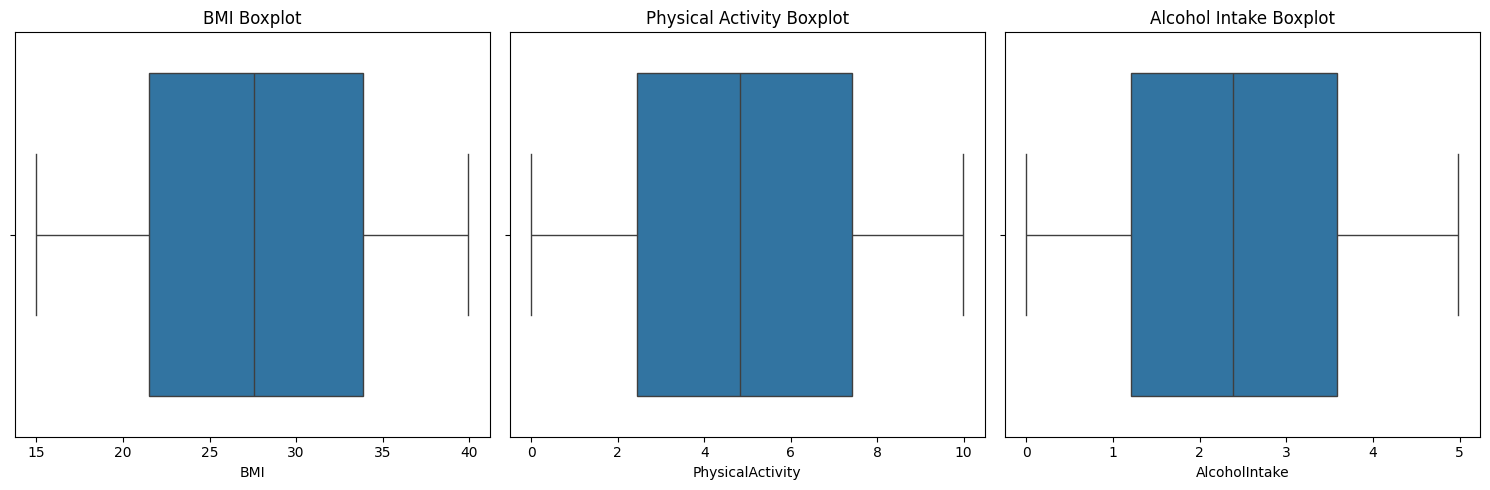

In [17]:
# Assess missing data
missing_data = data.isnull().sum() / len(data) * 100
print("Missing data percentage per column:")
print(missing_data)

# Detecting outliers using boxplots for continuous variables
plt.figure(figsize=(15, 5))

# BMI boxplot
plt.subplot(1, 3, 1)
sns.boxplot(x=data['BMI'])
plt.title('BMI Boxplot')

# PhysicalActivity boxplot
plt.subplot(1, 3, 2)
sns.boxplot(x=data['PhysicalActivity'])
plt.title('Physical Activity Boxplot')

# AlcoholIntake boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x=data['AlcoholIntake'])
plt.title('Alcohol Intake Boxplot')

plt.tight_layout()
plt.show()



6. **Data Splitting:**
   - Define a methodology to split the dataset into training, validation, and testing sets.
   - Ensure randomness and representativeness in each subset.

7. **Bias Mitigation:**
   - Implement techniques to identify and mitigate biases in the dataset.
   - Ensure fairness and equity in data representation.
   
    **Data Splitting**

    Use train_test_split to divide data into training (70%), validation (15%), and testing (15%) sets.

    **Bias Mitigation**

    Bias in a dataset can arise due to uneven representation of different groups, leading to unfair outcomes.

    **Mitigation:**

    1. Re-sampling: Apply techniques such as oversampling or undersampling to balance classes.
    
    2. Fair Representation: Ensure fair representation of minority groups by adjusting the dataset or model.

    3. Fair Algorithms: Implement algorithms that account for fairness, such as fair classifiers or regularization techniques.



In [20]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

# Split the dataset into training and testing sets (85% training + validation, 15% testing)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

# Further split the training set into training and validation sets (70% training, 15% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42, stratify=y_train_val)

# Output sizes of each set to verify the splits
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Testing set size: {len(X_test)}")

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Normalize the data (using Standard Scaler for continuous variables)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Checking distribution of target variable after balancing
print("Target distribution in the balanced training set:")
print(pd.Series(y_train_balanced).value_counts())


Training set size: 1049
Validation set size: 226
Testing set size: 225
Target distribution in the balanced training set:
Diagnosis
0    660
1    660
Name: count, dtype: int64


8. **Features for Model Training:**
   - Identify relevant features for training the model.
   - Rank features based on their significance to project objectives.

 **Your answer for features must be plotted/ show your working code-wise **
9. **Types of Data Handling:**
   - Classify the types of data (categorical, numerical, etc.) present in the dataset.
   - Plan preprocessing steps for each data type.

   **Types of data:**

  1. **Categorical Data:** These variables contain discrete categories or groups. In this dataset, categorical variables include:

     * Gender (e.g., Male, Female)
    * Smoking (e.g., Yes, No)
     * CancerHistory (e.g., Yes, No)
     * GeneticRisk (Ordinal: Low, Moderate, High)

 2. **Numerical Data:** These variables are measured and represented numerically. In this dataset:

      * BMI (Body Mass Index)
      * PhysicalActivity (hours per week or frequency)
      * AlcoholIntake (units per week)

  3. **Target Variable:**

      Diagnosis: Binary categorical data indicating whether cancer is present (e.g., 0 for No, 1 for Yes).

  **Preprocessing:**

  1. **Numerical Data Preprocessing:** Min-Max Scaling/StandardScaler
  2. **Categorical Data Preprocessing:** Label encoding or one-hot encoding and missing Data Handling

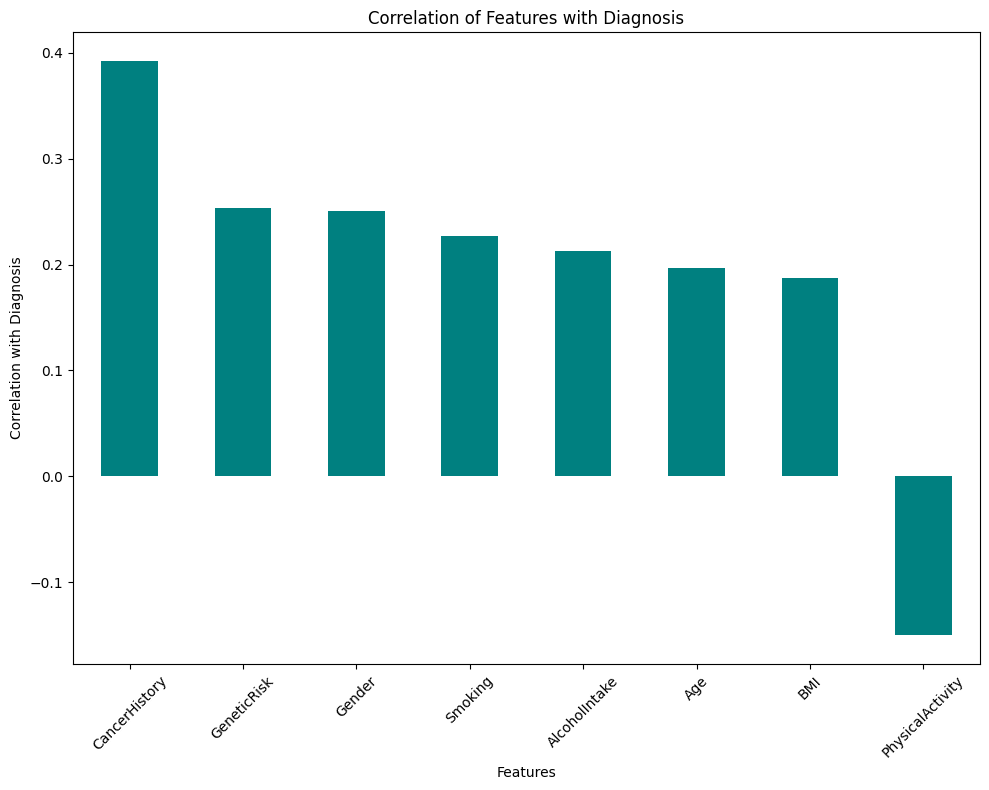

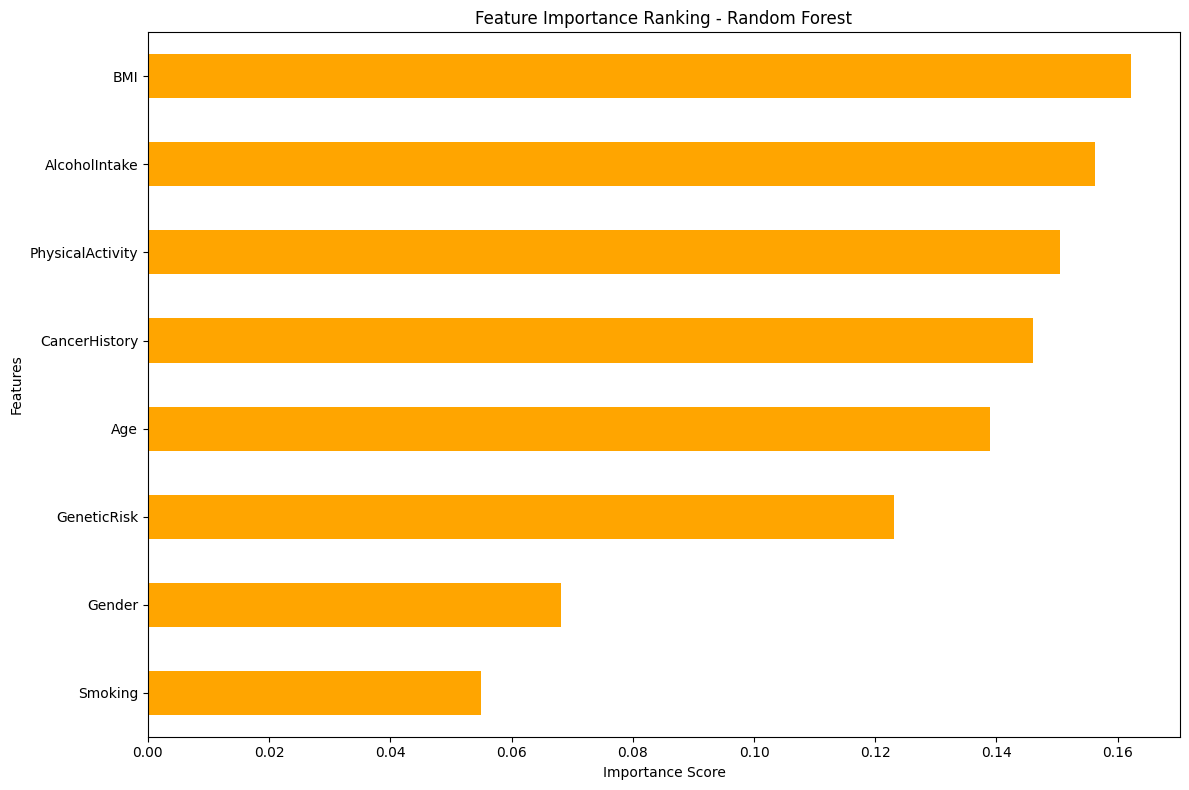

In [22]:
#print out relevant features
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

# Encode categorical variables for model training
label_encoder = LabelEncoder()
for col in ['Gender', 'Smoking', 'CancerHistory', 'GeneticRisk']:
    data[col] = label_encoder.fit_transform(data[col])


# Correlation Analysis for Numerical Features
plt.figure(figsize=(10, 8))
correlation_matrix = X.corrwith(y).sort_values(ascending=False)
correlation_matrix.plot(kind='bar', color='teal')
plt.title('Correlation of Features with Diagnosis')
plt.xlabel('Features')
plt.ylabel('Correlation with Diagnosis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance from the Random Forest model
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
sorted_feature_importance = feature_importance.sort_values(ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 8))
sorted_feature_importance.plot(kind='barh', color='orange')
plt.title('Feature Importance Ranking - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



10. **Data Transformation for Modeling:**
    - Specify methods for transforming raw data into a model-friendly format.
    - Detail steps for normalization, scaling, or encoding categorical variables.

Answer:

1. Handling Missing Values: Fill missing values with appropriate statistics (mean or median).

2. Encoding Categorical Variables: Use techniques like One-Hot Encoding or Label Encoding to convert categorical variables into numerical format.

3. Normalization/Scaling: Apply normalization (Min-Max Scaling) or standardization (Z-score scaling) to numerical features to bring them onto a common scale.

11. **Data Storage:**
    - Determine where and how processed data will be stored.
    - Choose suitable storage solutions ensuring accessibility and security.

Answer:

Database Storage: use relational databases (e.g., MySQL, PostgreSQL) or NoSQL databases (e.g., MongoDB) for efficient querying and data management.

---

#### Notes:
- This template provides a structured framework for documenting your data processing approach for the portfolio project.
- Fill out each section with specific details relevant to your project's requirements and objectives.
- Use additional cells as needed to provide comprehensive information.